# Import libraries and read in trainval and test datasets

In [2]:
#merge data from several states
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
trainval = pd.read_csv('./data/trainval_all_combined_v2.csv')
trainval.head()

,id,age,gender,size,breeds.primary,breeds.mixed,log_breed_pop,breed_popularity,contact.address.state,log_dog_pop,state_population,state_area,state_region,cg_adpt_time
0,36351232,1,Male,2,Labrador Retriever,True,11.241825,High,SC,9.580524,15.442575,10.373710,South,< 1 month
1,43002404,3,Male,2,Chocolate Labrador Retriever,True,7.844241,Low,LA,10.005954,15.359345,10.855975,South,1 - 2 weeks
2,33793853,2,Female,1,Beagle,False,9.883234,Medium,MA,10.196456,15.746440,9.264355,Northeast,< 1 month
3,35622718,4,Female,2,Labrador Retriever,True,11.241825,High,AZ,10.126591,15.778966,11.644006,West,> 3 months
4,45977377,3,Female,2,Border Collie,True,9.400465,Medium,LA,10.005954,15.359345,10.855975,South,< 3 months


In [4]:
test = pd.read_csv('./data/test_all_combined_v2.csv')
test.head()

,id,age,gender,size,breeds.primary,breeds.mixed,log_breed_pop,breed_popularity,contact.address.state,log_dog_pop,state_population,state_area,state_region,cg_adpt_time
0,35051791,4,Male,1,Shih Tzu,True,9.274910,Medium,WA,9.942420,15.834479,11.174694,West,< 3 months
1,39808452,1,Female,1,Terrier,True,10.291332,High,OR,9.680344,15.250491,11.496654,West,< 1 week
2,32838635,3,Female,3,Golden Retriever,False,8.728912,Low,ME,9.285448,14.109360,10.474100,Northeast,< 1 week
3,29518856,3,Female,3,Greyhound,False,8.146709,Low,GA,9.815039,16.171175,10.992740,South,> 3 months
4,31272523,2,Male,3,Shepherd,False,10.066074,Medium,NV,9.605957,14.932887,11.613377,West,< 1 month


# Convert columns and check for any remaining missing values

In [6]:
# Convert columns and check for any remaining missing values
cat_col = ['gender','breeds.primary','breed_popularity','contact.address.state','state_region','cg_adpt_time']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [7]:
# Check for any missing data
print("Table size -", end=' ')
print(trainval.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (trainval.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
#missing_cols = [col for col in extension_data.columns
#                     if extension_train[col].isnull().any()]

Table size - (483796, 14)
Checking for missing values..
Series([], dtype: int64)


In [8]:
len(trainval)

483796

# Divide into features and target

In [9]:
# Divide into features and target#test with small number of features, take off name_pop for now
X_features = ['age', 'gender', 'size',
               'breeds.primary','breeds.mixed', 'breed_popularity',
              'log_breed_pop', 'log_dog_pop', 'state_population',
             'state_area', 'state_region','contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breeds.primary,breeds.mixed,breed_popularity,log_breed_pop,log_dog_pop,state_population,state_area,state_region,contact.address.state
0,1,Male,2,Labrador Retriever,True,High,11.241825,9.580524,15.442575,10.373710,South,SC
1,3,Male,2,Chocolate Labrador Retriever,True,Low,7.844241,10.005954,15.359345,10.855975,South,LA
2,2,Female,1,Beagle,False,Medium,9.883234,10.196456,15.746440,9.264355,Northeast,MA
3,4,Female,2,Labrador Retriever,True,High,11.241825,10.126591,15.778966,11.644006,West,AZ
4,3,Female,2,Border Collie,True,Medium,9.400465,10.005954,15.359345,10.855975,South,LA


In [10]:
trainval_y = trainval['cg_adpt_time']
trainval_y.head()

0      < 1 month
1    1 - 2 weeks
2      < 1 month
3     > 3 months
4     < 3 months
Name: cg_adpt_time, dtype: category
Categories (5, object): [1 - 2 weeks, < 1 month, < 1 week, < 3 months, > 3 months]

# Split trainval into train and validation

In [12]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, test_size=0.2)
print('Training set size = {} and Validation set size = {}'.format(len(train_X),len(val_X)))

Training set size = 387036 and Validation set size = 96760


In [13]:
train_X.head()

,age,gender,size,breeds.primary,breeds.mixed,breed_popularity,log_breed_pop,log_dog_pop,state_population,state_area,state_region,contact.address.state
183779,2,Female,2,Shepherd,True,Medium,10.066074,10.126591,15.778966,11.644006,West,AZ
273712,3,Female,2,Black Labrador Retriever,True,Medium,8.959183,9.728777,17.172559,12.500982,South,TX
351832,2,Female,2,Basset Hound,False,Low,8.216899,8.735364,14.553013,11.708435,West,NM
136485,3,Male,2,Pit Bull Terrier,True,High,10.450481,9.726571,15.729866,10.648895,South,TN
164747,3,Female,2,Australian Shepherd,True,Medium,9.400299,9.547812,16.156369,10.893419,South,NC


In [14]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col = ['gender','breeds.primary','breed_popularity','contact.address.state','state_region','cg_adpt_time']

In [15]:
train_X.dtypes

age                         int64
gender                   category
size                        int64
breeds.primary           category
breeds.mixed                 bool
breed_popularity         category
log_breed_pop             float64
log_dog_pop               float64
state_population          float64
state_area                float64
state_region             category
contact.address.state    category
dtype: object

In [16]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [17]:
train_y.dtypes

CategoricalDtype(categories=['1 - 2 weeks', '< 1 month', '< 1 week', '< 3 months',
                  '> 3 months'],
                 ordered=False)

# Make a pipeline of random forest

In [18]:
from sklearn.pipeline import Pipeline

In [49]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        n_est,depth,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

## Tune hyperparameters

In [50]:
for n_est in [10, 50, 100, 200]:
    for depth in [10, 50, 100, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Fit time: 15.473611116409302 / Predict time: 2.494481086730957 / Accuracy: 0.301
Est: 10 / Depth: 50 ---- Fit time: 24.592058420181274 / Predict time: 0.7177867889404297 / Accuracy: 0.311
Est: 10 / Depth: 100 ---- Fit time: 26.772536754608154 / Predict time: 0.7061645984649658 / Accuracy: 0.304
Est: 10 / Depth: None ---- Fit time: 25.013928413391113 / Predict time: 0.6990461349487305 / Accuracy: 0.304
Est: 50 / Depth: 10 ---- Fit time: 39.952818870544434 / Predict time: 0.8098020553588867 / Accuracy: 0.303
Est: 50 / Depth: 50 ---- Fit time: 105.8734941482544 / Predict time: 1.4912152290344238 / Accuracy: 0.316
Est: 50 / Depth: 100 ---- Fit time: 110.92152380943298 / Predict time: 2.265547752380371 / Accuracy: 0.307
Est: 50 / Depth: None ---- Fit time: 104.27123022079468 / Predict time: 2.061232805252075 / Accuracy: 0.306
Est: 100 / Depth: 10 ---- Fit time: 67.69448971748352 / Predict time: 1.5016143321990967 / Accuracy: 0.303
Est: 100 / Depth: 50 ---- Fit time:

In [38]:
for n_est in [100, 150, 200, 250]:
    for depth in [30, 40, 50, 60]:
        train_RF(n_est, depth)

Est: 100 / Depth: 30 ---- Fit time: 199.89548540115356 / Predict time: 2.6306707859039307 / Accuracy: 0.322
Est: 100 / Depth: 40 ---- Fit time: 234.63526678085327 / Predict time: 3.1803433895111084 / Accuracy: 0.32
Est: 100 / Depth: 50 ---- Fit time: 255.78041696548462 / Predict time: 3.786173105239868 / Accuracy: 0.314
Est: 100 / Depth: 60 ---- Fit time: 271.31245279312134 / Predict time: 3.815086603164673 / Accuracy: 0.312
Est: 150 / Depth: 30 ---- Fit time: 303.3616180419922 / Predict time: 3.494270086288452 / Accuracy: 0.324
Est: 150 / Depth: 40 ---- Fit time: 376.6917893886566 / Predict time: 4.659846305847168 / Accuracy: 0.319
Est: 150 / Depth: 50 ---- Fit time: 394.3275411128998 / Predict time: 5.69328761100769 / Accuracy: 0.315
Est: 150 / Depth: 60 ---- Fit time: 408.54864287376404 / Predict time: 5.598904848098755 / Accuracy: 0.311
Est: 200 / Depth: 30 ---- Fit time: 405.64442110061646 / Predict time: 4.876736640930176 / Accuracy: 0.323
Est: 200 / Depth: 40 ---- Fit time: 479.

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
pipeline_temp2 = Pipeline(steps=[('preprocessor', oh),('model', rf)])
start = time.time()
pipeline_temp2.fit(train_X, train_y)
end = time.time()
fit_time = end - start
#scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
y_pred = pipeline_temp2.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
categorical_features = ['gender','breeds.primary','breed_popularity','contact.address.state','state_region']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')
pipeline_temp = Pipeline(steps=[('preprocessor', preprocessor),('model', rf)])
start = time.time()
pipeline_temp.fit(train_X, train_y)
end = time.time()

# look for feature importances in one hot encoded

In [23]:
pipeline_temp['model'].feature_importances_

array([0.04095653, 0.04111344, 0.00318689, 0.00688339, 0.00400655,
       0.00496026, 0.00244575, 0.00510502, 0.00192092, 0.00381635,
       0.00124437, 0.00426865, 0.00240664, 0.0050331 , 0.00138886,
       0.00189136, 0.00217637, 0.00239393, 0.00466397, 0.00191413,
       0.00151818, 0.00263083, 0.00208589, 0.00163129, 0.00233757,
       0.00463112, 0.00223994, 0.0017546 , 0.00470521, 0.00165049,
       0.00329448, 0.00240778, 0.00241489, 0.00316199, 0.00415221,
       0.00289904, 0.00317957, 0.00443762, 0.00179266, 0.00274861,
       0.0018412 , 0.00281454, 0.00838105, 0.00164744, 0.00168278,
       0.00833217, 0.00148196, 0.00189435, 0.00272091, 0.00532075,
       0.00284234, 0.00573466, 0.00280885, 0.0035433 , 0.00261423,
       0.00154503, 0.00320587, 0.00172396, 0.00445538, 0.00178918,
       0.00431035, 0.00242793, 0.00232073, 0.00230671, 0.00475224,
       0.00167645, 0.00281773, 0.00163334, 0.00143742, 0.00216702,
       0.00242105, 0.00327275, 0.00434899, 0.00385917, 0.00483

In [24]:
y_pred = pipeline_temp.predict(val_X)
round((y_pred==val_y).sum()/len(y_pred), 3)

0.313

In [46]:
def train_RF_2(n_est, depth):
    categorical_features = ['gender', 'state_region']
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)], remainder='passthrough')
    pipeline_temp = Pipeline(steps=[('preprocessor', preprocessor),('model', rf)])
    start = time.time()
    pipeline_temp.fit(train_X, train_y)
    end = time.time()
    fit_time = end - start
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    start = time.time()
    y_pred = pipeline_temp.predict(val_X)
    end = time.time()
    predict_time = end - start
    #r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- Fit time: {} / Predict time: {} / Accuracy: {}'.format(
        n_est,depth,fit_time, predict_time, round((y_pred==val_y).sum()/len(y_pred), 3)))

In [48]:
for n_est in [100, 150, 200, 250]:
    for depth in [30, 40, 50, 60]:
        train_RF_2(n_est, depth)

Est: 100 / Depth: 30 ---- Fit time: 54.64836120605469 / Predict time: 3.0222551822662354 / Accuracy: 0.304
Est: 100 / Depth: 40 ---- Fit time: 52.29619288444519 / Predict time: 4.100038290023804 / Accuracy: 0.303
Est: 100 / Depth: 50 ---- Fit time: 59.462018728256226 / Predict time: 3.8525631427764893 / Accuracy: 0.302
Est: 100 / Depth: 60 ---- Fit time: 55.26665735244751 / Predict time: 3.5056264400482178 / Accuracy: 0.303
Est: 150 / Depth: 30 ---- Fit time: 52.687329053878784 / Predict time: 2.758556604385376 / Accuracy: 0.303
Est: 150 / Depth: 40 ---- Fit time: 49.007484912872314 / Predict time: 2.799514055252075 / Accuracy: 0.303
Est: 150 / Depth: 50 ---- Fit time: 47.07659840583801 / Predict time: 2.7487106323242188 / Accuracy: 0.304
Est: 150 / Depth: 60 ---- Fit time: 47.86254525184631 / Predict time: 2.8676652908325195 / Accuracy: 0.302
Est: 200 / Depth: 30 ---- Fit time: 48.47635579109192 / Predict time: 3.041867256164551 / Accuracy: 0.303
Est: 200 / Depth: 40 ---- Fit time: 48

In [157]:
y_pred_train = pipeline_temp.predict(train_X)
round((y_pred_train==train_y).sum()/len(y_pred_train), 3)

0.361

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred, labels=["< 1 week" , "1 - 2 weeks", "< 1 month", "< 3 months", "> 3 months"])

array([[445,  13,  22, 188,  24],
       [197,  12,  31, 231,  35],
       [179,  11,  40, 271,  57],
       [134,  10,  56, 408,  99],
       [ 59,   3,  37, 317, 111]], dtype=int64)

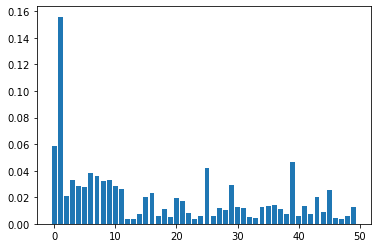

In [117]:
plt.bar(range(len(pipeline_temp['model'].feature_importances_)), pipeline_temp['model'].feature_importances_)
plt.show()

# Gradient Boosting

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
oh2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
gb = GradientBoostingClassifier(n_estimators=150, max_depth=30, learning_rate=0.3)
pipeline_temp2 = Pipeline(steps=[('preprocessor', oh2),('model', gb)])

In [152]:
pipeline_temp2.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False)),
                ('model',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=30, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                   

In [155]:
y_pred2 = pipeline_temp2.predict(val_X)
round((y_pred2==val_y).sum()/len(y_pred), 3)

0.326

In [128]:
import pickle
filename = './models/rfpipe_cg.pkl'
pickle.dump(pipeline_temp, open(filename, 'wb'))

In [153]:
import pickle
filename = './models/gbpipe_cg.pkl'
pickle.dump(pipeline_temp2, open(filename, 'wb'))